<a href="https://colab.research.google.com/github/VarunVaibhav/Predicting-Term-Deposit-Subscription-by-a-client/blob/main/Predicting_Term_Deposit_Subscription_by_a_client_by_Varun_Vaibhav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
#load the CSV file
df = pd.read_csv('/content/bank-additional-full.csv')
print ('Number of samples: ',len(df))

Number of samples:  41188


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
#count the number of rows for each type
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

I created a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set.

In [8]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

The prevalence of the positive class is calculated here...

In [9]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [10]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.113


The prevlence of the positive class is 11.3% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.3%.

## Exploring the data set and unique values

In [11]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [12]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,OUTPUT_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
print('Number of columns:',len(df.columns))

Number of columns: 22


In [15]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

### Numerical Features

These are numeric data. The numerical columns that we will use can be seen below:

In [16]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

In [17]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857


### Graphical Representation of Numerical Features

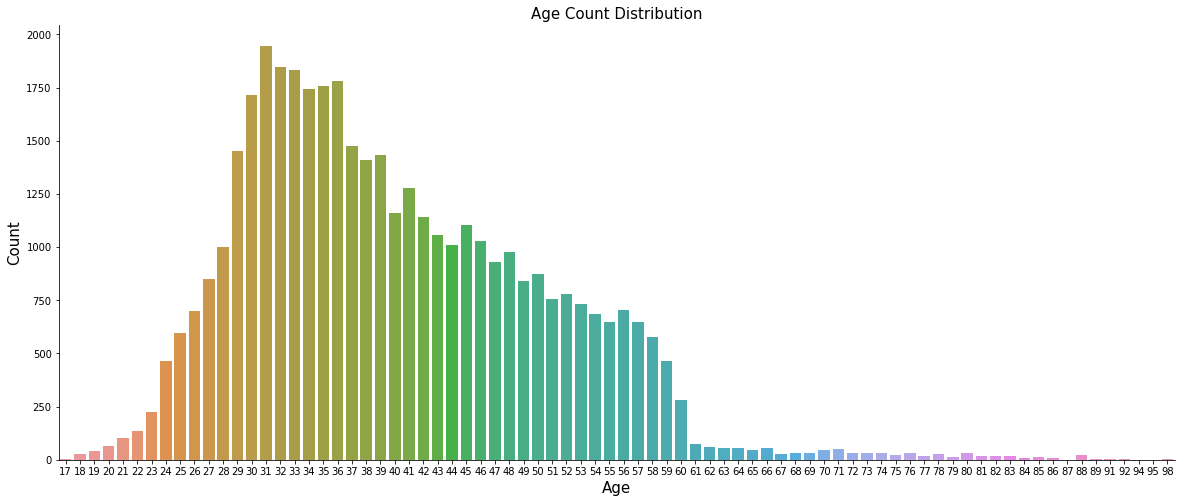

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  df[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

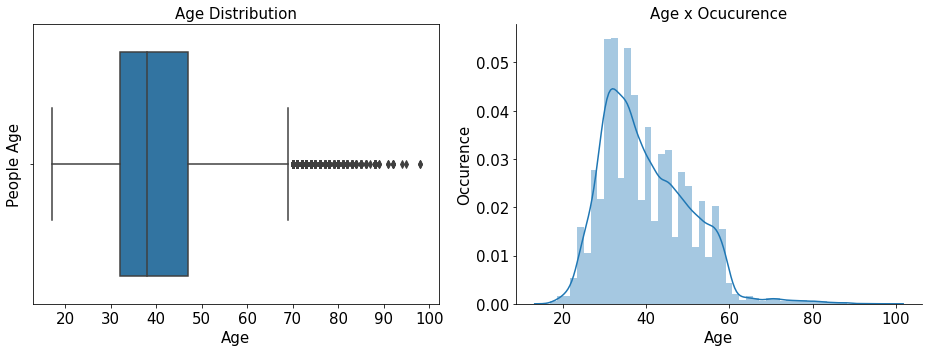

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_ylabel('People Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

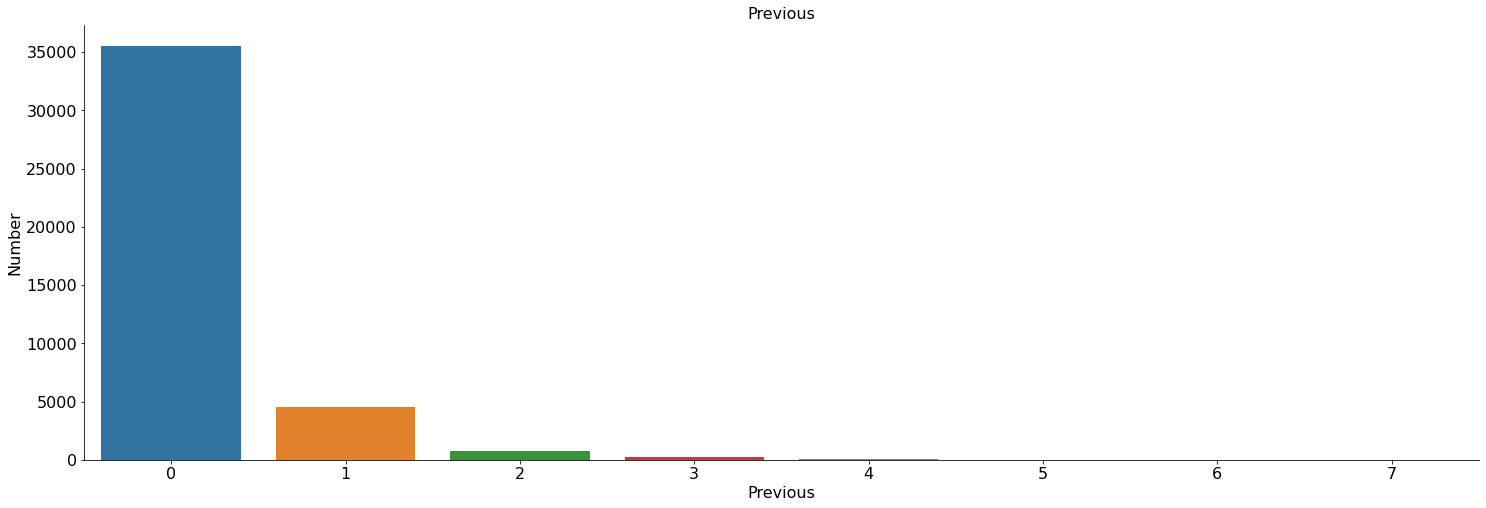

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = df[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

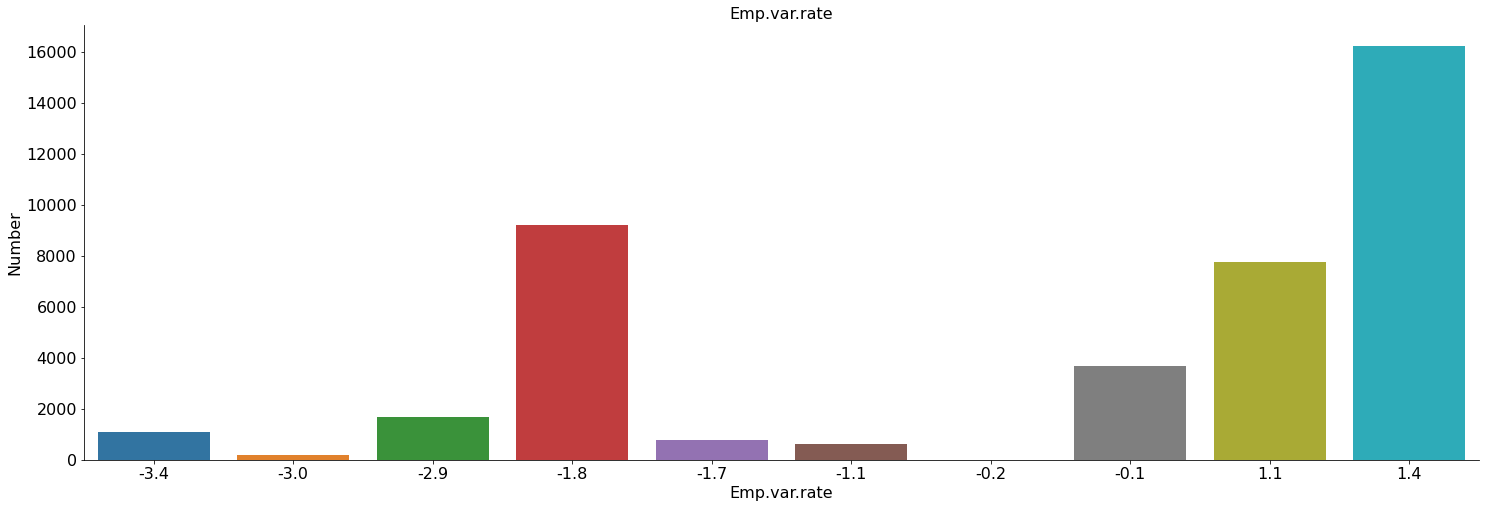

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = df[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

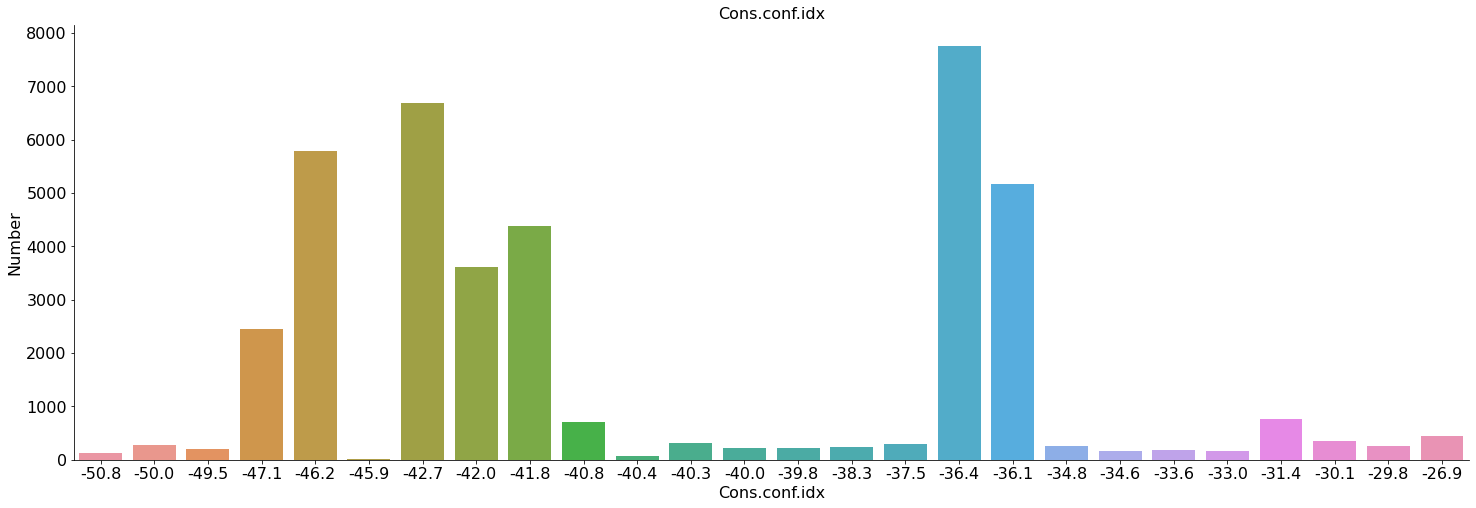

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'cons.conf.idx', data = df[cols_num])
ax.set_xlabel('Cons.conf.idx', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Cons.conf.idx', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

Let's check if there are any missing values in the numerical data. 

In [28]:
df[cols_num].isnull().sum()

campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
age               0
euribor3m         0
dtype: int64

## Categorical Features

In [29]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

Let's check if there are any missing data

In [30]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

## One-Hot Encoding

In [31]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Graphical Representation of Categorical Features

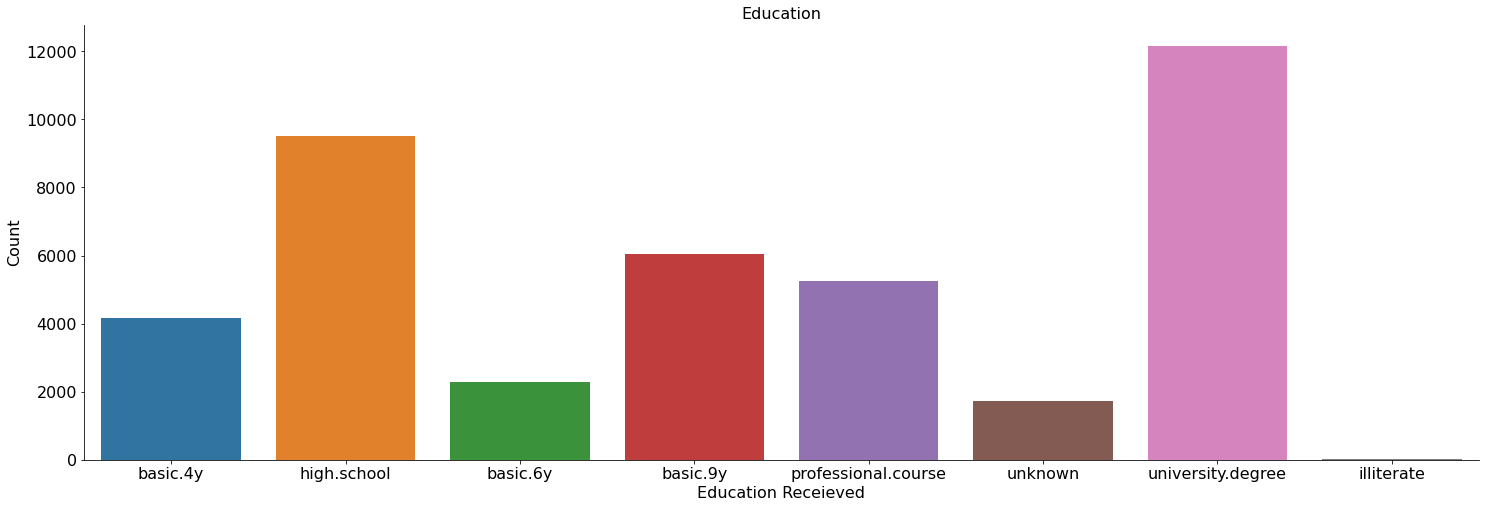

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

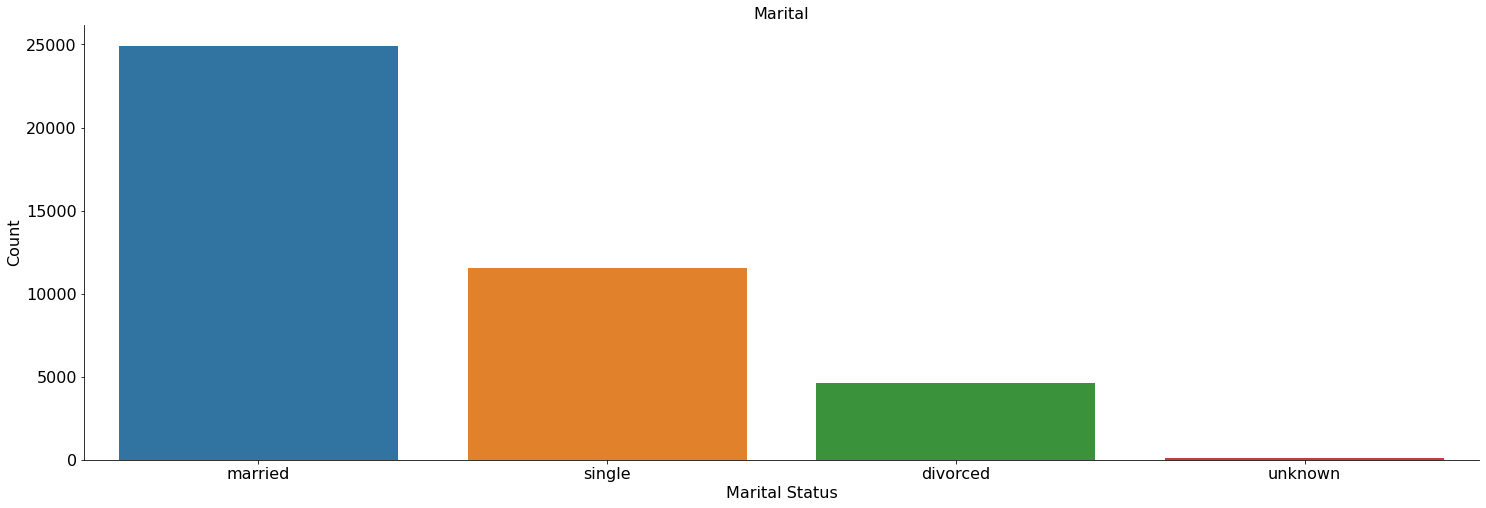

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

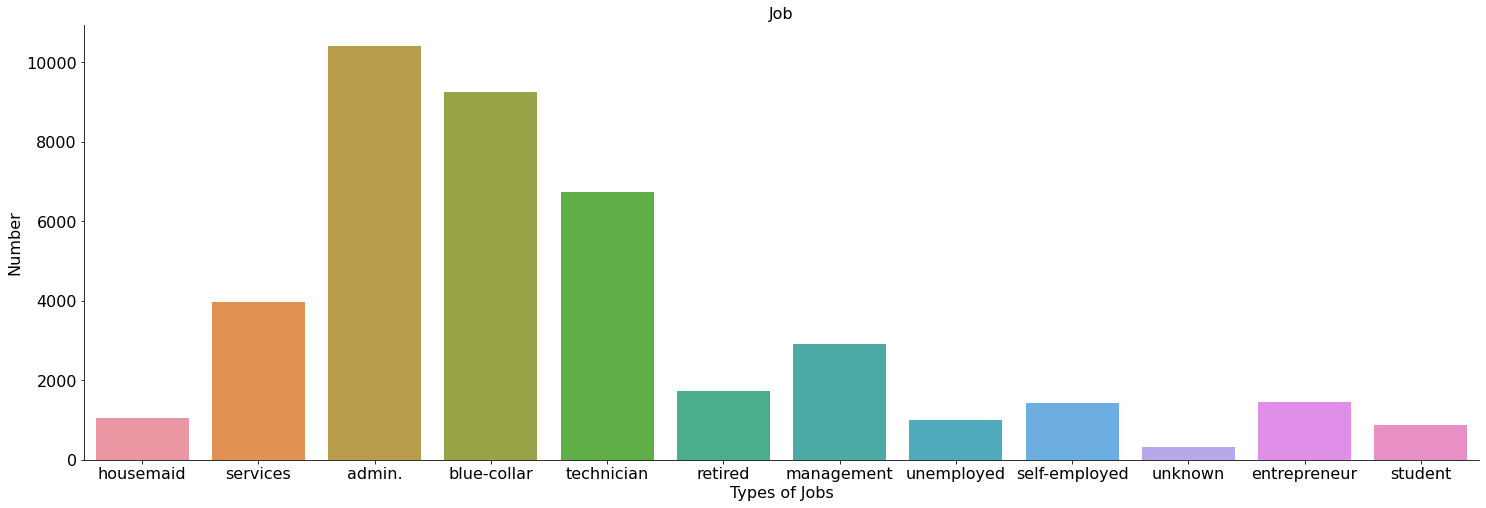

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

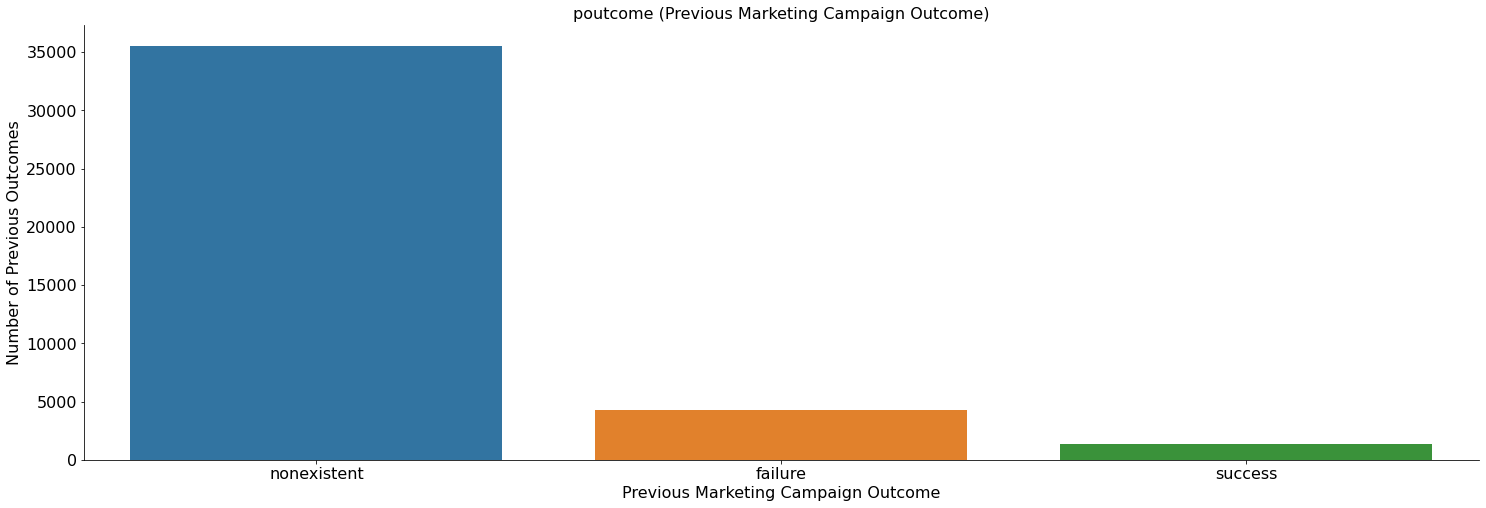

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

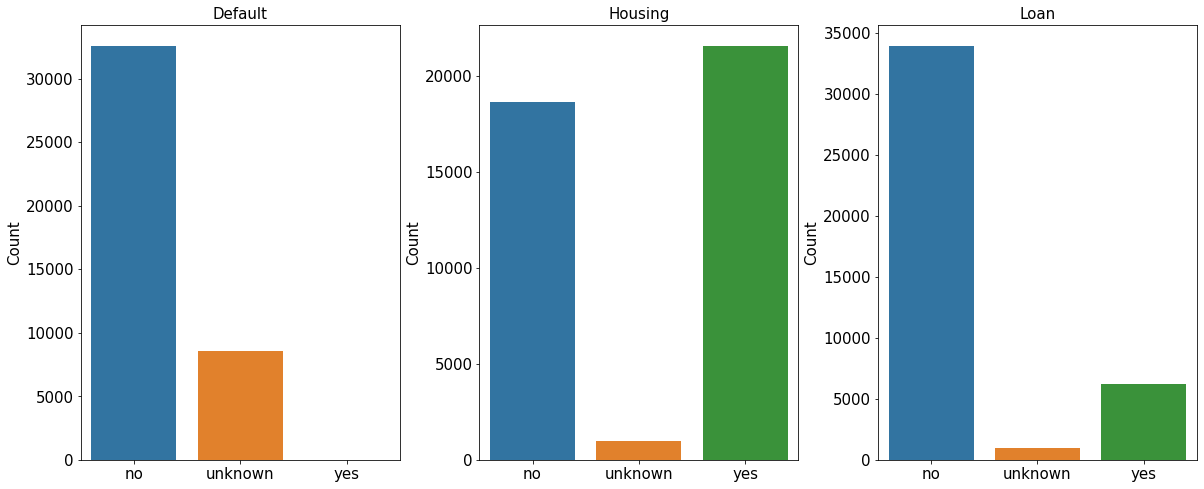

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = df[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = df[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = df[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

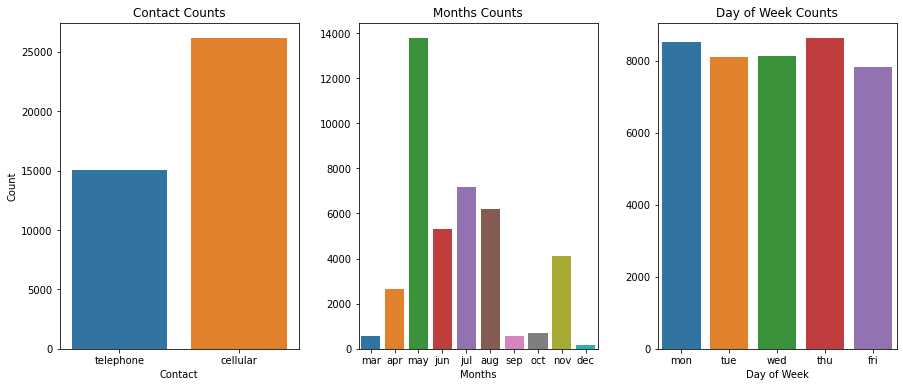

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(df[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(df[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


In order to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns. 

In [38]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [39]:
cols_all_cat=list(cols_new_cat.columns)

In [40]:
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


### Summary of Features Engineering 

In [41]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


Data check for missing values

In [43]:
df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

poutcome_success         0
job_self-employed        0
education_high.school    0
education_basic.9y       0
education_basic.6y       0
                        ..
housing_no               0
default_yes              0
default_unknown          0
default_no               0
campaign                 0
Length: 62, dtype: int64

Good to go! No empty cells! I also created a new dataframe below, which includes the columns of interest. 

In [44]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [45]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [46]:
len(cols_input)

62

In [47]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


## Building Training, Validation & Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.

Let's shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples. random_state is just specified so the project is reproducable.

The training (df_train_all), validation (df_valid) and test (df_test) set were created below.

Shuffle the samples

In [48]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 10)
df_data = df_data.reset_index(drop = True)

30% of the validation and test samples:

In [49]:
df_valid_test=df_data.sample(frac=0.30,random_state=10)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Split into test and validation samples by 50% which makes 15% of test and 15% of validation samples.

In [50]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 10)
df_valid = df_valid_test.drop(df_test.index)

Use the rest of the data for the training samples

In [51]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [52]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6178):0.114
Valid prevalence(n = 6178):0.106
Train all prevalence(n = 28832):0.114


We need to balance the data set because if we use the training data as the predictive model the accuracy is going to be very high because we haven't caught any of the y output which states whether a person will buy a term deposit or not. There are more negatives than positive so the predictive models assigns negatives to much of the samples. Creating a balance sheet will allow 50% of the samples to be both positive and negative.

In [53]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 10)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 10).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 6560):0.500


In [54]:
# split the validation into positive and negative
rows_pos = df_valid.OUTPUT_LABEL == 1
df_valid_pos = df_valid.loc[rows_pos]
df_valid_neg = df_valid.loc[~rows_pos]

# merge the balanced data
df_valid = pd.concat([df_valid_pos, df_valid_neg.sample(n = len(df_valid_pos), random_state = 10)],axis = 0)

# shuffle the order of training samples 
df_valid = df_valid.sample(n = len(df_valid), random_state = 10).reset_index(drop = True)

print('Valid balanced prevalence(n = %d):%.3f'%(len(df_valid), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid balanced prevalence(n = 1308):0.500


In [55]:
# split the test into positive and negative
rows_pos = df_test.OUTPUT_LABEL == 1
df_test_pos = df_test.loc[rows_pos]
df_test_neg = df_test.loc[~rows_pos]

# merge the balanced data
df_test = pd.concat([df_test_pos, df_test_neg.sample(n = len(df_test_pos), random_state = 10)],axis = 0)

# shuffle the order of training samples 
df_test = df_test.sample(n = len(df_test), random_state = 10).reset_index(drop = True)

print('Test balanced prevalence(n = %d):%.3f'%(len(df_test), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Test balanced prevalence(n = 1412):0.500


All 4 dataframes were saved intto csv and the cols_input

In [56]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

Saving cols_input too with a package called pickle

In [57]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Any missing values were filled with the mean value

In [58]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

The mean value from the training data:

In [59]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

Loaded the means

In [60]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,NaN,0.000000
1,campaign,2.573703
2,pdays,963.459039
3,previous,0.172031
4,emp.var.rate,0.088742


In [61]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [62]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28832, 62)
Training shapes: (6560, 62) (6560,)
Validation shapes: (1308, 62) (1308,)


Created a scalar, saved it, and scaled the X matrices

In [63]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [67]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [68]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection 

In [69]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    f1 = 2 * (precision * recall) / (precision + recall)
   
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print('f1:%.3f'%f1)
    print(' ')
    return auc, accuracy, recall, precision, specificity, f1

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [70]:
thresh = 0.5

## Model Selection: baseline models

In this section, we will first compare the performance of the following 7 machine learning models using default hyperparameters:

-K-nearest neighbors

-Logistic regression

-Stochastic gradient descent

-Naive Bayes

-Decision tree

-Random forest

-Gradient boosting classifier


### K nearest neighbors (KNN)

Training and evaluating KNN performance:

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

In [72]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity, knn_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity, knn_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.799
accuracy:0.745
recall:0.627
precision:0.820
specificity:0.854
prevalence:0.500
f1:0.711
 
Validation:
AUC:0.790
accuracy:0.741
recall:0.630
precision:0.809
specificity:0.838
prevalence:0.500
f1:0.709
 


For the training set, I was able to get an AUC of 79.9% which catches 62.7% (recall) of potential customers using a threshold of 0.5 which is good. Let's take a look at the remaining algorithms below!

### Logistic Regression

Training and evaluating the logistic regression performance:

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 10)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity, lr_train_f1= print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity, lr_valid_f1= print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.802
accuracy:0.744
recall:0.656
precision:0.795
specificity:0.831
prevalence:0.500
f1:0.719
 
Validation:
AUC:0.791
accuracy:0.745
recall:0.670
precision:0.789
specificity:0.821
prevalence:0.500
f1:0.725
 


### Stochastic Gradient Descent

Training and evaluating Stochastic Gradient Descent model performance:

In [75]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 10)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=10, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [76]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity, sgdc_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity, sgdc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.798
accuracy:0.740
recall:0.674
precision:0.777
specificity:0.807
prevalence:0.500
f1:0.722
 
Validation:
AUC:0.788
accuracy:0.742
recall:0.683
precision:0.773
specificity:0.800
prevalence:0.500
f1:0.726
 


### Naive Bayes

Training and evaluating Naive Bayes model performance:

In [77]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity, nb_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity, nb_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.776
accuracy:0.712
recall:0.738
precision:0.702
specificity:0.687
prevalence:0.500
f1:0.720
 
Validation:
AUC:0.761
accuracy:0.705
recall:0.729
precision:0.695
specificity:0.680
prevalence:0.500
f1:0.712
 


### Decision Tree Classifier

Training and evaluating Decision Tree model performance:

In [79]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 10)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [80]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity, tree_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity, tree_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.880
accuracy:0.805
recall:0.721
precision:0.866
specificity:0.885
prevalence:0.500
f1:0.787
 
Validation:
AUC:0.769
accuracy:0.733
recall:0.657
precision:0.775
specificity:0.806
prevalence:0.500
f1:0.711
 


### Random Forest

Training and evaluating Random Forest model performance:

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 10)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [82]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity, rf_train_f1 =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity, rf_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.820
accuracy:0.752
recall:0.684
precision:0.791
specificity:0.820
prevalence:0.500
f1:0.734
 
Validation:
AUC:0.801
accuracy:0.748
recall:0.687
precision:0.782
specificity:0.809
prevalence:0.500
f1:0.731
 


### Gradient Boosting Classifier

Training and evaluating Gradient Boosting model performance:

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=10)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity, gbc_train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity, gbc_valid_f1 = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.903
accuracy:0.822
recall:0.760
precision:0.868
specificity:0.884
prevalence:0.500
f1:0.811
 
Validation:
AUC:0.769
accuracy:0.717
recall:0.679
precision:0.735
specificity:0.755
prevalence:0.500
f1:0.706
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn - making a dataframe with the results of all the baseline models and plot the outcomes. In this project, we will utilize the Area under the ROC curve (AUC) to evaluate the best model. This is a good data science performance metric for picking the best model since it captures the trade off between the true positive and false positive and does not require selecting a threshold.

In [85]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,],
                          'f1':[knn_train_f1, knn_valid_f1,lr_train_f1,lr_valid_f1,sgdc_train_f1,sgdc_valid_f1,nb_train_f1,nb_valid_f1,tree_train_f1,tree_valid_f1,rf_train_f1,rf_valid_f1,gbc_train_f1,gbc_valid_f1,],
                          })

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

I picked AUC (area under the ROC curve) as a performance indicator. The reason I chose this over other indicators such as precision and accuracy is that it measures the relationshio between true positives and false positives in our data in order to derive a score that depicts that. Also, AUC is widely used and an easier metric to compare many models with.

All the algorithms have similar training AUC's, but the ones that stood out are decision tree (DT) and gradient boosting (GB). I would choose gradient boosting as the best metric to use because it has a higher auc (0.9) than the other algorithms. At a threshold of 0.5, an auc of 0.9 is good as it signifies that it is more than just a random guess towards a positive class and it is close to 1 which is great!

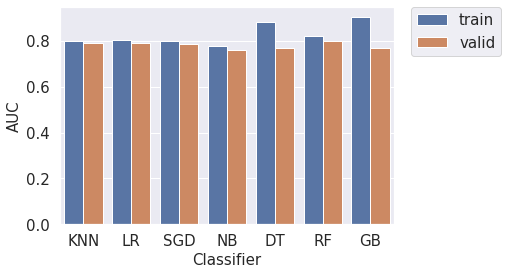

In [87]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

## Learning Curves

We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn’s website with a small change of plotting the AUC instead of accuracy. Random Forest has the best AUC score (0.801) for the validation model and the learning curve for the model will be displayed below.

In [88]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

The Random Forest model with max_depth = 20, resulting in high variance

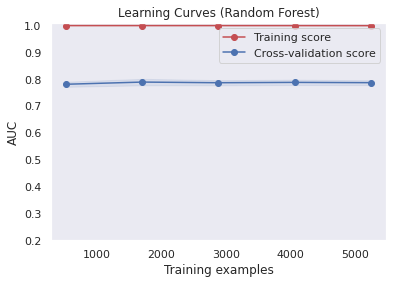

In [89]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
estimator = RandomForestClassifier(max_depth = 20, random_state = 10)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### Variance and Bias

In the case of random forest, we can see the model has high variance because the training and cross-validation scores show data points which are very spread out from one another. High variance would cause an algorithm to model the noise in the training set (overfitting).

Depending on the learning curve, there are a few strategies we can employ to improve the models

High Variance:
- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture

High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture

## Feature Importance

This section focuses on the importance of the different features generated and in the dataframe. Depending on the importance score of some features, we can focus on higher importance scores to see if the AUC score (performance) of the model will improve.

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 10)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [92]:
feature_importances

,importance
cons.price.idx,0.915537
nr.employed,0.317259
euribor3m,0.248747
month_aug,0.204718
month_mar,0.194926
...,...
poutcome_failure,-0.111998
month_may,-0.140402
month_jun,-0.142414
contact_telephone,-0.150739


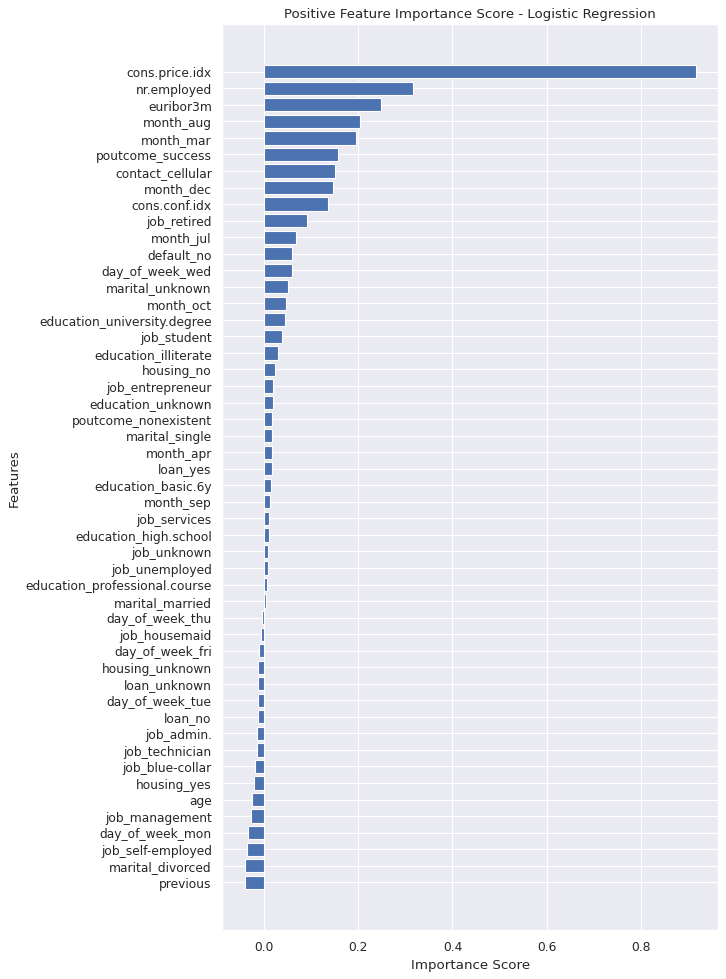

In [93]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

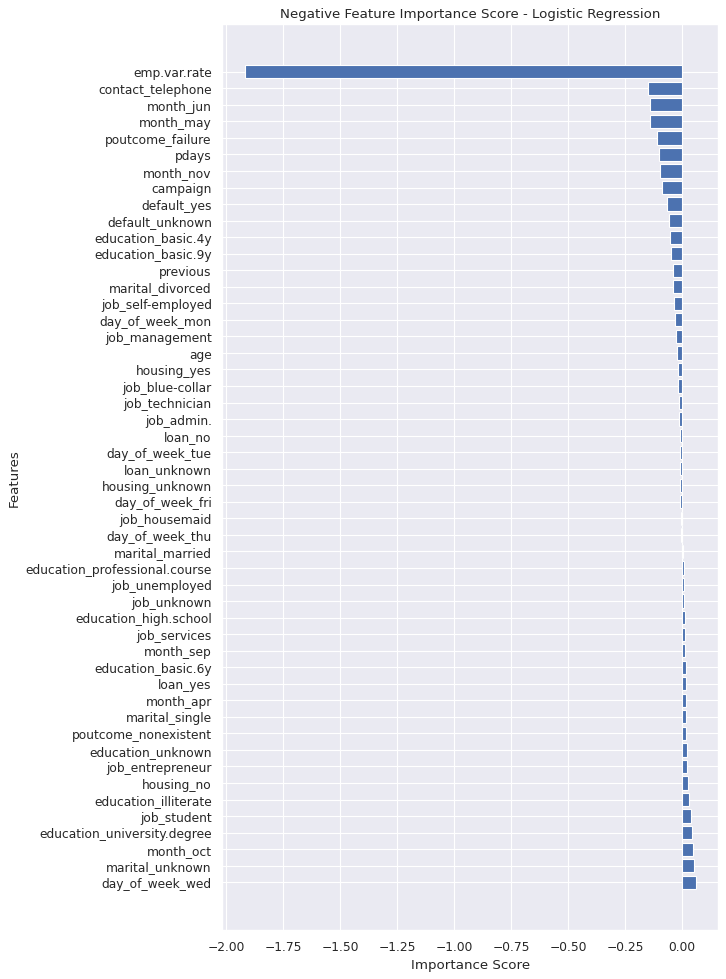

In [94]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically.

### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 10)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [96]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
euribor3m,0.202841
nr.employed,0.178897
emp.var.rate,0.135509
cons.conf.idx,0.072974
cons.price.idx,0.060682


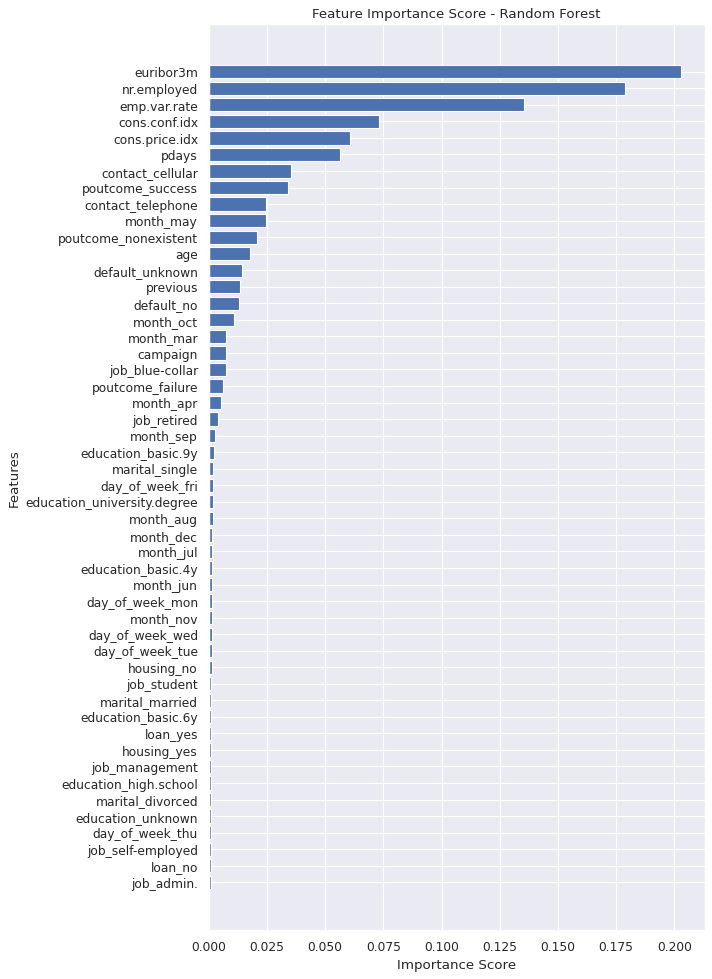

In [97]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Other Algorithm Feature Importance Scores

### Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=10)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
euribor3m,0.531834
nr.employed,0.098005
age,0.072723
campaign,0.035325
cons.conf.idx,0.023444


I realized the features that have more positive impact on the predictive outcomes of the model: euribor3m (3 month rate - daily indicator) and nr.employed are very crucial as their importance score is higher than other numerical variables.

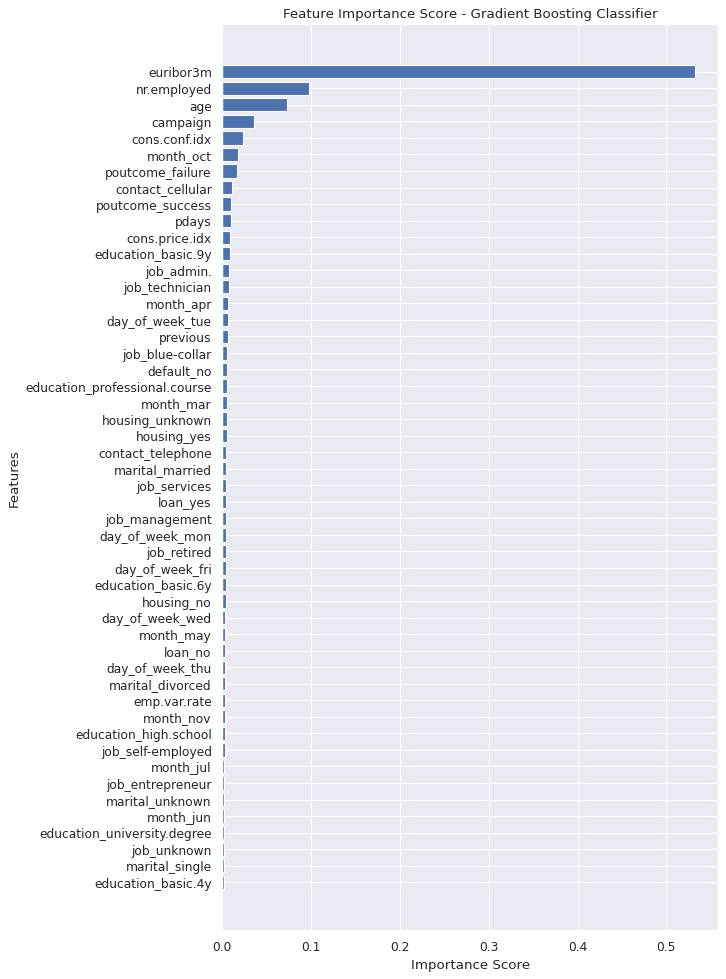

In [100]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

### Decision Trees

In [101]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 10)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [102]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
euribor3m,0.538830
nr.employed,0.099604
age,0.077797
campaign,0.032789
month_oct,0.019589


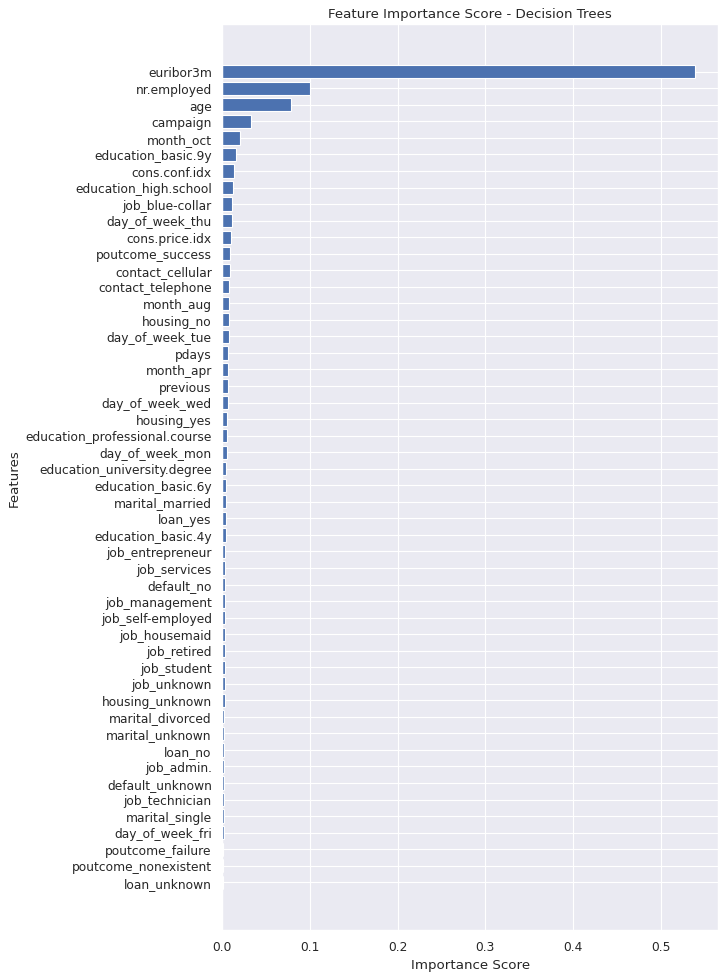

In [103]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

## Hyperparameter tuning

A hyperparameter is a tool used in machine learning in order to estimate the model parameters (used in tuning a predictive modeling problem).  Hyperparameters are used in various machine learning algorithms. 

In [104]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 10)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

n_estimators is a hyperparameter in the RandomForestClassifier that depending on the numbers of estimators entered the model can be overfitted, good compromise or underfitted. n_estimators is used for fine tuning the models in order to fit the training data. max_depth is also another hyperparameter; it controls the depth of the machine learning algorithm model.

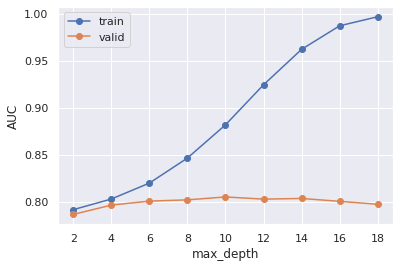

In [105]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

Using RandomizedSearchCV to optimize a few of the baseline models. GradientBoosting Classifier may take a while so one might need to adjust the number of iterations or specific parameters. If this takes too long on the computer, one can take it out.

In [106]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [107]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [108]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [109]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 10)

In [110]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.2min finished


73.02936840057373


See the best parameters

In [111]:
rf_random.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 400}

In [112]:
rf=RandomForestClassifier(max_depth = 6, random_state = 10)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.820
Validation AUC:0.801
Optimized Random Forest
Training AUC:0.900
Validation AUC:0.805


Optimized SGDClassifier

In [113]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 10)
sgdc.fit(X_train_tf, y_train)

SGDClassifier(alpha=0.1, average=False, class_weight=None, early_stopping=False,
              epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=10, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [114]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 10)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

3.1087310314178467


In [115]:
sgdc_random.best_params_

{'alpha': 0.01, 'max_iter': 200, 'penalty': 'l1'}

In [116]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.798
Validation AUC:0.788
Optimized sgdc
Training AUC:0.793
Validation AUC:0.793


Optimized Gradient Boosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=10)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [118]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 10)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

27.919119119644165


In [119]:
gbc_random.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}

In [120]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.903
Validation AUC:0.769
Optimized gbc
Training AUC:0.810
Validation AUC:0.803


Analyzing the 3 results

In [121]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [122]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.787801
1,SGD,optimized,0.792615
2,RF,baseline,0.800606
3,RF,optimized,0.804985
4,GB,baseline,0.768994
5,GB,optimized,0.803132


Comparing the performance of the optimized models to the baseline models. 

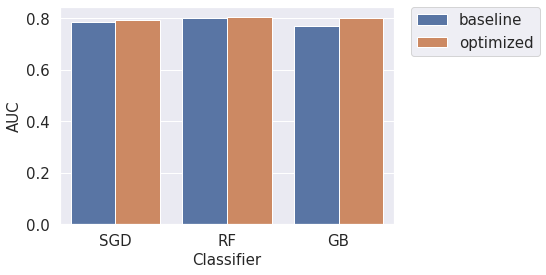

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Picking the best model

I picked Gradient Boosting optimized version as my best model because the optimized version has a higher auc metric than the baseline models of Stochastic Gradient Descent and Random Forest. Gradient Boosting's AUC score also tells me that most of my data are predicted positives which has a good chance of occuring and can be used to make strategic decisions for management.

In [124]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Below is the evaluation of the performance of the best model on the training, validation and test sets. I also created an ROC curve.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [126]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [127]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [128]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Prediction possibilities

In [129]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Evaluating performances

In [130]:
thresh = .5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity, train_f1 = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity, valid_f1 = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity, test_f1 = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.810
accuracy:0.755
recall:0.652
precision:0.822
specificity:0.859
prevalence:0.500
f1:0.727
 
Validation:
AUC:0.803
accuracy:0.753
recall:0.656
precision:0.814
specificity:0.850
prevalence:0.500
f1:0.727
 
Test:
AUC:0.765
accuracy:0.722
recall:0.622
precision:0.777
specificity:0.822
prevalence:0.500
f1:0.691
 


### The ROC Curve

We can also create the We can also create the ROC curve for the 3 datasets as shown belowROC curve for the 3 datasets as shown below

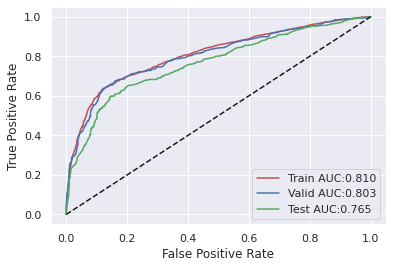

In [131]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Our data shows that the results for the training, validation and testing data sets are skewed towards the true positive rate and above the treshold of 0.5 which is great! For example, the test AUC of 0.765 means that the gradient boosting model has a performance of 76.5%.

In [132]:
df_data.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,-1.8,93.075,-47.1,5099.1,38,1.405,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2,999,0,1.4,93.918,-42.7,5228.1,28,4.963,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,3,1,-1.8,93.369,-34.8,5008.7,58,0.635,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
3,3,999,0,-1.8,93.075,-47.1,5099.1,48,1.405,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,16,999,0,1.4,94.465,-41.8,5228.1,28,4.959,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


# Conclusion

Through this project, I created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. The model's performance is 76.5%.

A precision of 0.78 divided by a prevalence of 0.50 gives us 1.56, which means that the machine learning model helps us 1.56 times better than randomly guessing. The model was able to catch 62.2% of customers that will subscribe to a term deposit.

We should focus on targeting customers with high cons.price.idx (consumer price index) and nr.employed (number of employees - quarterly indicator) as they are high importance features for the model and business.

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue.